In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
data=pd.read_csv("processed.cleveland.data.txt", header=None)
data=np.array(data)
print(data.shape)

x=np.array(data[:,0:11])
print(x[1,:])
heart=np.array(data[:,13])
#y=np.zeros(len(heart))
y=heart>0 # 1 if heart is > 0

# Split into train and test data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.5)
print(x_train.shape, x_test.shape)

(303, 14)
[67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0 1.5 2.0]
(151, 11) (152, 11)


Text(0, 0.5, 'Error')

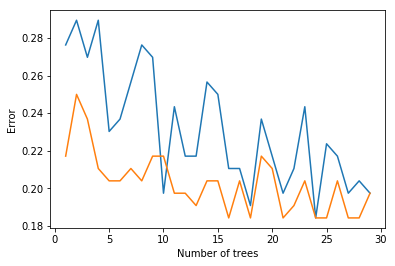

In [4]:
# SI TARDA DEMASIADO MAS ADELANTE SE HACE BAGGING CON SKLEARN Y ES MAS RAPIDO

def error_rate(y_a, y_b):
    return np.sum(y_a != y_b)/len(y_a)

ntr=np.arange(1,20)   # Number of trees
bag_tester=np.zeros(len(ntr))   # Bagging test error
rf_tester=np.zeros(len(ntr))   # Random forest test error
bag_oob=np.zeros(len(ntr))   # Bagging out-of-bag error
rf_oob=np.zeros(len(ntr))   # Random forest out-of-bag error


# Generate bootstrapping data sets

for i in range(len(ntr)):
    #print("i=",i)
    predictions=np.zeros([len(x_test),ntr[i]]) # Bagging predictions
    rf_predictions=np.zeros([len(x_test),ntr[i]]) # Rand forest predictions
    
    for j in range(ntr[i]):

        # Select training and test data from bootstrapping         
        boot_xtrain, boot_xvalidation, boot_ytrain, boot_yvalidation= sklearn.model_selection.train_test_split(x_train, y_train, test_size=0.3)
        
        
        # BAGGING
        # Generate trees
        dtree = DecisionTreeClassifier()
        dtree.fit(boot_xtrain,boot_ytrain) 
        predictions[:,j]=dtree.predict(x_test)
        #print("------j=",j)
        #print(predictions[0:5,:])
        
        # Random forest
        clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
        clf.fit(boot_xtrain,boot_ytrain)
        rf_predictions[:,j]=clf.predict(x_test)
    
    
    # More common class values of each predictions row
    pred_class=np.zeros(len(x_test))  # For Bagging
    rf_pred_class=np.zeros(len(x_test))  # For rand forest
    
    
    for j in range(len(x_test)):
        
        # Bagging most common class
        a=predictions[j,:]
        (values,counts) = np.unique(a,return_counts=True)
        ind=np.argmax(counts)
        pred_class[j]=values[ind]    
        
        # rand forest most common class
        a=rf_predictions[j,:]
        (values,counts) = np.unique(a,return_counts=True)
        ind=np.argmax(counts)
        rf_pred_class[j]=values[ind] 
    
    #print("pred_class=",pred_class[0:5])
    bag_tester[i]=error_rate(y_test, pred_class)
    rf_tester[i]=error_rate(y_test, rf_pred_class)

plt.plot(ntr,bag_tester,label='test: bagging')
plt.plot(ntr,rf_tester,label='test: random forest')
plt.xlabel('Number of trees')
plt.ylabel('Error')


In [3]:
# Bagging with sklearn 
from sklearn.ensemble import BaggingClassifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [5]:
data=pd.read_csv("processed.cleveland.data.txt", header=None)
data=np.array(data)
print(data.shape)

x=np.array(data[:,0:11])
print(x[1,:])
heart=np.array(data[:,13])
#y=np.zeros(len(heart))
y=heart>0 # 1 if heart is > 0

# Split into train and test data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y,test_size=0.5)
print(x_train.shape, x_test.shape)


(303, 14)
[67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0 1.5 2.0]
(151, 11) (152, 11)


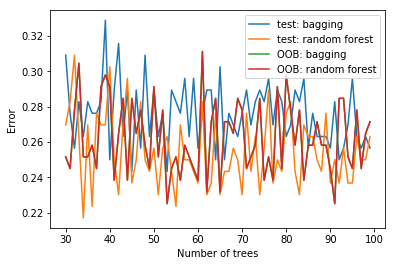

In [6]:
def error_rate(y_a, y_b):
    return np.sum(y_a != y_b)/len(y_a)

ntr=np.arange(30,100)   # Number of trees
bag_tester=np.zeros(len(ntr))   # Bagging test error
rf_tester=np.zeros(len(ntr))   # Random forest test error

bag_oobs=np.zeros(len(ntr))
rf_oobs=np.zeros(len(ntr))

# Generate bootstrapping data sets

for i in range(len(ntr)):

    # bagging         
    bagclf= sklearn.ensemble.BaggingClassifier(n_estimators=ntr[i],oob_score=True)
    bagclf.fit(x_train, y_train)
    bag_predictions=bagclf.predict(x_test)

    # Save out-of-bag errors
    bag_oobs[i] = 1 - bagclf.oob_score_


    # Random forest
    n_feat=int(np.sqrt(x_test.shape[1]))
    ### rfclf = RandomForestClassifier(n_estimators=n_est,oob_score=True)
    rfclf = RandomForestClassifier(n_estimators=ntr[i],oob_score=True, max_features=n_feat)
    rfclf.fit(x_train,y_train)
    rf_predictions=rfclf.predict(x_test)

    rf_oobs[i] = 1 - bagclf.oob_score_
    
    
    #print("pred_class=",pred_class[0:5])
    bag_tester[i]=error_rate(y_test, bag_predictions)
    rf_tester[i]=error_rate(y_test, rf_predictions)

plt.plot(ntr,bag_tester,label='test: bagging')
plt.plot(ntr,rf_tester,label='test: random forest')
plt.plot(ntr,bag_oobs,label='OOB: bagging')
plt.plot(ntr,rf_oobs,label='OOB: random forest')
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()

# b)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [8]:
data=pd.read_csv("OJ.csv")
print(data.keys())
print(data.shape)
x=np.array(data[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']])
y=np.array(data['Purchase'])

# make y numeric
y_numeric=np.zeros(len(y),dtype=int)
y_numeric[y=="MM"]=1   # MM is 1 and CH is cero

# Split into train and test data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y_numeric,test_size=0.5)
print(x_train.shape, x_test.shape)

Index(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')
(1070, 19)
(535, 16) (535, 16)


[16 16  8]


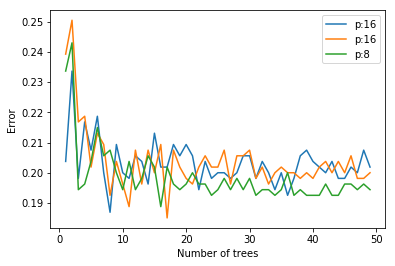

In [9]:
# GRAFICA 8.10

def error_rate(y_a, y_b):
    return np.sum(y_a != y_b)/len(y_a)

ntr=np.arange(1,50)   # Number of trees
m1=x_test.shape[1]
m2=int(np.round(x_test.shape[1]/2))
m3=int(np.round(np.sqrt(x_test.shape)))
m=np.array([m1,m2,m3])
print(m)

rf_tester=np.zeros([len(ntr),len(m)])   # Random forest test error for every m (=p, sqrt(p), p/2)



    
for i in range(len(ntr)):

    rf_predictions=np.zeros([len(x_test),ntr[i],len(m)]) # Rand forest predictions


    for j in range(ntr[i]):

        # Random forest
        for k in range(len(m)):
            n_feat=m[k]
            n_est=ntr[j]
            rfclf = RandomForestClassifier(n_estimators=n_est,max_features=n_feat)
            rfclf.fit(x_train,y_train)
            rf_predictions[:,j,k]=rfclf.predict(x_test)

    # More common class values of each predictions row
    rf_pred_class=np.zeros([len(x_test),len(m)])  # For rand forest


    for j in range(len(x_test)):
        for k in range(len(m)):
            
            # rand forest most common class
            a=rf_predictions[j,:,k]
            (values,counts) = np.unique(a,return_counts=True)
            ind=np.argmax(counts)
            rf_pred_class[j,k]=values[ind] 

    #print("pred_class=",pred_class[0:5])
    for k in range(len(m)):
        rf_tester[i,k]=error_rate(y_test, rf_pred_class[:,k])

plt.plot(ntr,rf_tester[:,0],label='p:%d'%m[0])
plt.plot(ntr,rf_tester[:,1],label='p:%d'%m[1])
plt.plot(ntr,rf_tester[:,2],label='p:%d'%m[2])
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()

[16  8  4]


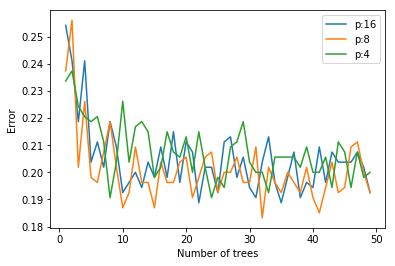

In [11]:
# GRAFICA 8.10

def error_rate(y_a, y_b):
    return np.sum(y_a != y_b)/len(y_a)

ntr=np.arange(1,50)   # Number of trees
m1=x_test.shape[1]
m2=int(np.round(x_test.shape[1]/2))
m3=int(np.round(np.sqrt(x_test.shape[1])))
m=np.array([m1,m2,m3])
print(m)

rf_tester=np.zeros([len(ntr),len(m)])   # Random forest test error for every m (=p, sqrt(p), p/2)



    
for i in range(len(ntr)):

    rf_predictions=np.zeros([len(x_test),len(m)]) # Rand forest predictions


    for j in range(len(m)):

        # Random forest

        n_feat=m[j]
        n_est=ntr[i]
        rfclf = RandomForestClassifier(n_estimators=n_est,max_features=n_feat)
        rfclf.fit(x_train,y_train)
        rf_predictions[:,j]=rfclf.predict(x_test)


    #print("pred_class=",pred_class[0:5])
    for k in range(len(m)):
        rf_tester[i,k]=error_rate(y_test, rf_predictions[:,k])

plt.plot(ntr,rf_tester[:,0],label='p:%d'%m[0])
plt.plot(ntr,rf_tester[:,1],label='p:%d'%m[1])
plt.plot(ntr,rf_tester[:,2],label='p:%d'%m[2])
plt.xlabel('Number of trees')
plt.ylabel('Error')
plt.legend()

In [ ]:
# c)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [2]:
data=pd.read_csv("OJ.csv")
print(data.keys())
print(data.shape)
x=np.array(data[['WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE']])
y=np.array(data['Purchase'])

# make y numeric
y_numeric=np.zeros(len(y),dtype=int)
y_numeric[y=="MM"]=1   # MM is 1 and CH is cero

# Split into train and test data
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y_numeric,test_size=0.5)
print(x_train.shape, x_test.shape)

Index(['Unnamed: 0', 'Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH',
       'PriceMM', 'DiscCH', 'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH',
       'SalePriceMM', 'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM',
       'PctDiscCH', 'ListPriceDiff', 'STORE'],
      dtype='object')
(1070, 19)
(535, 16) (535, 16)


In [3]:
import scipy.integrate
def conf_mtx(y_predprob, y_numeric, thr):  # Return confusion matrix
    
    mtx=np.zeros([2,2])  # >> mtx[:,0]  (first column) for negative true values, mtx[:,1] for positive true values
    y_pred=np.zeros(len(y_predprob),dtype=int)
    for j in range(len(y_pred)):
        if y_predprob[j]>=thr:
            y_pred[j]=1
        else:
            y_pred[j]=0
    for i in range(len(y_pred)):
        mtx[y_pred[i],y_numeric[i]]=mtx[y_pred[i],y_numeric[i]]+1

    return mtx

def error_rate(y_a, y_b):
    return np.sum(y_a != y_b)/len(y_a)

def roc_area(clf,x_train,x_test,y_train,y_test):
    thrs=np.linspace(0.001,0.5,100)
    ypred_test=clf.predict(x_test)
    ypred_train=clf.predict(x_train)
    testerr=error_rate(ypred_test,y_test)
    trainerr=error_rate(ypred_train,y_train)

    # Areas with tree model
    y_predprob=clf.predict_proba(x_train)[:,1]  

    # FOR ROC
    tpr=np.zeros(len(thrs))
    fpr=np.zeros(len(thrs))
    
    for j in range(len(thrs)):
        mtx=conf_mtx(y_predprob, y_numeric, thrs[j])  
        tpr[j]=(mtx[1,1]/np.sum(mtx[:,1])) # TPR = TP/(TP+FN)
        fpr[j]=(mtx[1,0]/np.sum(mtx[:,0])) # FPR = FP/(TN+FP)
    
    ii = np.argsort(fpr)
    roc_area = scipy.integrate.trapz(fpr[ii], tpr[ii])
    return roc_area, testerr,trainerr


Para determinar el mejor modelo se comparan el área de la curva ROC, el error de prueba y de entrenamiento

In [4]:
## Log regr
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs',multi_class='multinomial').fit(x_train, y_train)
logroc_area, logtesterr,logtrainerr=roc_area(clf,x_train,x_test,y_train,y_test)
print('Log regression ROC_area, test error, train error >>',roc_area(clf,x_train,x_test,y_train,y_test))

Log regression ROC_area, test error, train error >> (0.42018590411261564, 0.17757009345794392, 0.15514018691588785)


/srv/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [5]:
## LDA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis().fit(x_train,y_train)
#roc_area, testerr, trainerr=roc_area(clf,x_train,x_test,y_train,y_test)
print('LDA ROC_area, test error, train error >>',roc_area(clf,x_train,x_test,y_train,y_test))


LDA ROC_area, test error, train error >> (0.4073635703689676, 0.18691588785046728, 0.15700934579439252)


/srv/conda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [6]:

## TREE
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print('Tree ROC_area, test error, train error >>',roc_area(dtree,x_train,x_test,y_train,y_test))


Tree ROC_area, test error, train error >> (0.0021146987343370273, 0.2542056074766355, 0.005607476635514018)


In [7]:


## rand forest
n_feat=int(np.sqrt(x_test.shape[1]))
rfclf = RandomForestClassifier(n_estimators=30, max_features=n_feat)
rfclf.fit(x_train,y_train)
print('Random forest ROC_area, test error, train error >>',roc_area(rfclf,x_train,x_test,y_train,y_test))


Random forest ROC_area, test error, train error >> (0.17786352302496605, 0.2261682242990654, 0.011214953271028037)


Se puede observar que los métodos Log regression y LDA permiten obtener un área de ROC considerable y unos errores de prueba y de entrenamiento relativamente bajos. Sin embargo, random forest no presenta mensajes de advertencia y permite obtener también un área considerable y errores de entrenamiento y de prueba lo suficientemente bajos